<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Analysez les ventes d'une librairie avec Python <br>
</h1>
</div>

<div style="display: flex; text-align:center; background-color: rgb(153,102,153);" >
<h1 style="margin: auto; padding: 30px; ">Partie 3 - Analyse temporelle <br>
</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [2]:
# On va directement mettre la colonne date en DatetimeIndex
rapport = pd.read_csv('rapport.csv', index_col='date', parse_dates=True)

In [3]:
rapport.head()

,id_prod,session_id,client_id,sex,birth,price,categ,transac_year,weekday,month,age,intervalle_age
date,,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,Friday,5,36,"[30, 50)"
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,Tuesday,7,35,"[30, 50)"
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,Saturday,8,36,"[30, 50)"
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,Sunday,5,53,"[50, 70)"
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,Monday,5,54,"[50, 70)"


In [4]:
print(rapport.shape)
rapport.dtypes

(679332, 12)


id_prod            object
session_id         object
client_id          object
sex                object
birth               int64
price             float64
categ               int64
transac_year        int64
weekday            object
month               int64
age                 int64
intervalle_age     object
dtype: object

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.1- Analyse temporelle globale</h3>
</div>

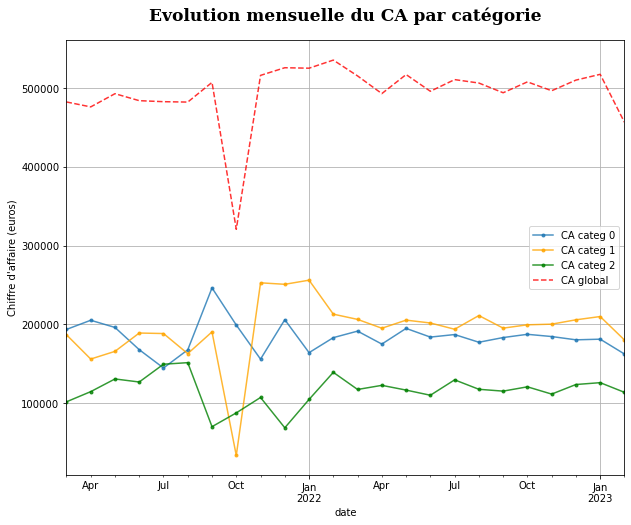

In [5]:

plt.figure(figsize=(10,8))

ca_cat0 = rapport.loc[rapport['categ']==0]
ca_cat0['price'].resample('M').sum().plot(label='CA categ 0', alpha=0.8, marker=".")

ca_cat1 = rapport.loc[rapport['categ']==1]
ca_cat1['price'].resample('M').sum().plot(label='CA categ 1', color='orange', alpha=0.8, marker=".")

ca_cat2 = rapport.loc[rapport['categ']==2]
ca_cat2['price'].resample('M').sum().plot(label='CA categ 2', color='green', alpha=0.8, grid=True, marker=".")

Ca_global = rapport['price'].resample('M').sum()
# 2ème axe y pour CA global
#plt.twinx()

Ca_global.plot(label='CA global', color='red', ls='--', alpha=0.8, grid=True)
plt.ylabel("Chiffre d'affaire (euros)")
plt.title("Evolution mensuelle du CA par catégorie", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
plt.legend(loc='center right')
plt.show()

On note une très forte baisse du CA en oct 2021 notamment dû à la catégorie 1. Il ne semble pas y avoir de variation similaire sur les autres années, c'est donc un "problème" ponctuel. Etant donné qu'on est en mois, ce n'est pas précis, on va regarder par semaine. 

Text(0.5, 0, 'Jour')

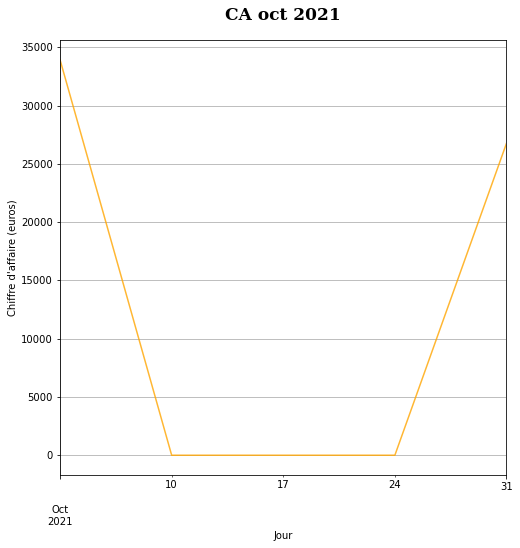

In [6]:
# Slicing sur le mois d'octobre tous les dimanches
plt.figure(figsize=(8,8))
trou_ca_cat1 = ca_cat1.resample('W-SUN').sum()
trou_ca_cat1['2021-10-01':'2021-10-31']['price'].plot(grid=True, label='Catégorie 1', color='orange', alpha=0.8)


plt.title("CA oct 2021", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
plt.ylabel("Chiffre d'affaire (euros)")
plt.xlabel('Jour')

Il n'y a pas eu de CA pour le mois d'octobre du dimanche 10 au dimanche 24, soit 0 vente. Ca ne peut pas être un bug du site ou une fermeture temporaire car les produits des autres catégories ont été vendus. On peut penser à un problème de stock ou une stratégie commerciale afin de privilégier les ventes des autres catégories ? Cela va être problématique pour l'analyse on ne va pas en tenir compte.

In [7]:
#On va supprimer le mois d'octobre pour toutes les catégories confondues:
filtered_df = rapport.loc['2021-10-01':'2021-10-31'] #21606 lignes
# Comme c'est des index, on va rajouté à drop.index
rapport.drop(filtered_df.index, inplace=True)
rapport.shape

C:\Users\Camil\AppData\Local\Temp/ipykernel_18672/3800636156.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  filtered_df = rapport.loc['2021-10-01':'2021-10-31'] #21606 lignes


(657726, 12)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.2- Analyse CA annuel</h3>
</div>

## Pour 2021

Text(0, 0.5, 'Euros')

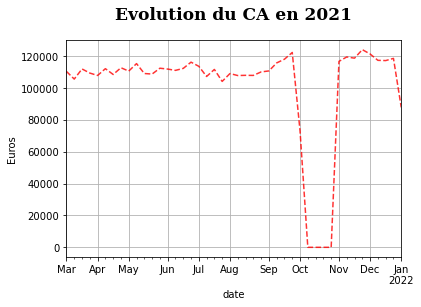

In [8]:
rapport.loc['2021']['price'].resample('W').sum().plot(label='CA global', color='red', ls='--', alpha=0.8, grid=True)

plt.title("Evolution du CA en 2021", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
plt.ylabel('Euros')

In [9]:
# CA global par mois pour 2021
name = rapport[['price', 'month']].copy()
ca_2021= name.loc['2021'].groupby('month', as_index=False).sum()
print("CA global 2021 par mois :")
# Tx de var = VA - VD / VD * 100
ca_2021['diff_ca'] = ca_2021['price'].diff().shift(-1)
ca_2021['tx_var'] = round((ca_2021['diff_ca']/ca_2021['price'])*100,2).shift(1)
print(ca_2021)
tot2021 = round(ca_2021['price'].sum(),2)
print('total :', str(tot2021))

CA global 2021 par mois :
   month      price   diff_ca  tx_var
0      3  482536.37  -6278.11     NaN
1      4  476258.26  16770.33   -1.30
2      5  493028.59  -8865.55    3.52
3      6  484163.04  -1285.08   -1.80
4      7  482877.96   -497.41   -0.27
5      8  482380.55  24987.81   -0.10
6      9  507368.36   8905.77    5.18
7     11  516274.13   9717.63    1.76
8     12  525991.76       NaN    1.88
total : 4450879.02


In [10]:
# CA par categ par mois pour 2021 : 
for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("CA:",subset.loc['2021'].groupby(['categ', 'month'])['price'].sum())
    print()



--------------------
Catégorie : 0

CA: categ  month
0      3        193724.93
       4        205371.42
       5        196271.84
       6        168017.63
       7        144793.35
       8        167833.38
       9        246481.59
       11       156015.96
       12       206110.72
Name: price, dtype: float64


--------------------
Catégorie : 1

CA: categ  month
1      3        186974.17
       4        156138.35
       5        165893.40
       6        189162.04
       7        188523.27
       8        162991.38
       9        190613.78
       11       252910.39
       12       251026.75
Name: price, dtype: float64


--------------------
Catégorie : 2

CA: categ  month
2      3        101837.27
       4        114748.49
       5        130863.35
       6        126983.37
       7        149561.34
       8        151555.79
       9         70272.99
       11       107347.78
       12        68854.29
Name: price, dtype: float64



Plus précisément en 2021 : hormis la baisse d'octobre, le CA était plutôt stationnaire entre 100K et 120K, avec une légère hausse entre sept et dec

Fréquence d'achat par mois 2021 :
date
2021-03-31    28610
2021-04-30    28457
2021-05-31    28293
2021-06-30    26857
2021-07-31    24742
2021-08-31    25659
2021-09-30    33326
2021-10-31        0
2021-11-30    28321
2021-12-31    32464
Freq: M, Name: price, dtype: int64
total achats= 256729


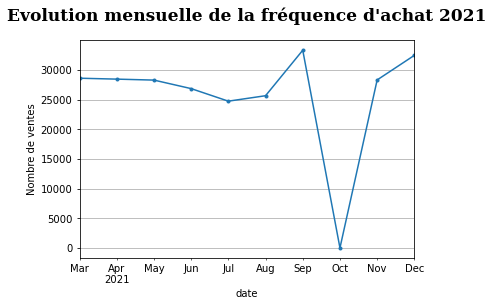

In [11]:
# Fréquence d'achat par mois pour 2021 : 

name = rapport['price'].copy()
fa_2021= name.loc['2021'].resample('M').count()
print("Fréquence d'achat par mois 2021 :")
print(fa_2021)
total2021 = fa_2021.sum()
print("total achats=", total2021)

fa_2021.plot(grid=True, marker=".")
plt.ylabel('Nombre de ventes')
plt.title("Evolution mensuelle de la fréquence d'achat 2021", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});


In [12]:
# Fréquence d'achat par categ par mois pour 2021 :

for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("Fréquence d'achat:",subset.loc['2021']['price'].resample('M').count())
    print()


--------------------
Catégorie : 0

Fréquence d'achat: date
2021-03-31    18140
2021-04-30    19356
2021-05-31    18509
2021-06-30    15905
2021-07-31    13582
2021-08-31    15737
2021-09-30    23154
2021-10-31        0
2021-11-30    14610
2021-12-31    19309
Freq: M, Name: price, dtype: int64


--------------------
Catégorie : 1

Fréquence d'achat: date
2021-03-31     9134
2021-04-30     7579
2021-05-31     8107
2021-06-30     9264
2021-07-31     9169
2021-08-31     7954
2021-09-30     9268
2021-10-31        0
2021-11-30    12316
2021-12-31    12259
Freq: M, Name: price, dtype: int64


--------------------
Catégorie : 2

Fréquence d'achat: date
2021-03-31    1336
2021-04-30    1522
2021-05-31    1677
2021-06-30    1688
2021-07-31    1991
2021-08-31    1968
2021-09-30     904
2021-10-31       0
2021-11-30    1395
2021-12-31     896
Freq: M, Name: price, dtype: int64



## Pour 2022

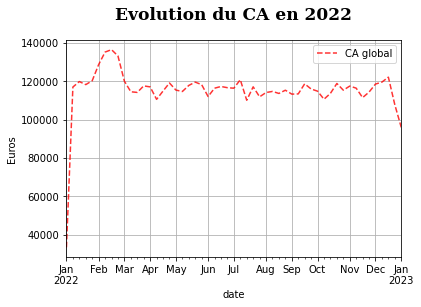

In [13]:
rapport.loc['2022']['price'].resample('W').sum().plot(label='CA global', color='red', ls='--', alpha=0.8, grid=True)
plt.title("Evolution du CA en 2022", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
plt.ylabel('Euros')
plt.legend()

On constate une augmentation en début d'année : mi janvier à mi fév, sinon CA plutôt stable

C:\Users\Camil\AppData\Local\Temp/ipykernel_18672/582129654.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rapport.loc['2022-01':'2022-03']['price'].resample('W').sum().plot(label='CA global', color='red', ls='--', alpha=0.8, grid=True)


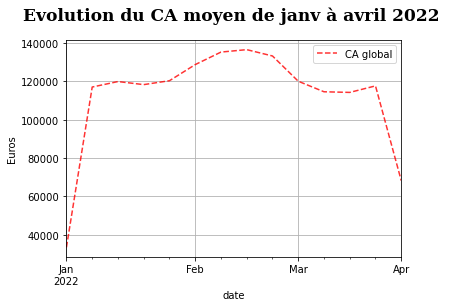

In [14]:
rapport.loc['2022-01':'2022-03']['price'].resample('W').sum().plot(label='CA global', color='red', ls='--', alpha=0.8, grid=True)
plt.title("Evolution du CA moyen de janv à avril 2022 ", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
plt.ylabel('Euros')
plt.legend()

In [15]:
name = rapport[['price', 'month']].copy()
ca_2022 = name.loc['2022'].groupby('month', as_index=False).sum()
print("CA global 2022 par mois :")
ca_2022['diff_ca'] = ca_2022['price'].diff().shift(-1)
ca_2022['tx_var'] = round(ca_2022['diff_ca']/ca_2022['price']*100,2).shift(1)
print(ca_2022)
tot2022 = round(ca_2022['price'].sum(),2)
print('total :', str(tot2022))


CA global 2022 par mois :
    month      price   diff_ca  tx_var
0       1  525392.19  10296.35     NaN
1       2  535688.54 -20114.97    1.96
2       3  515573.57 -22425.67   -3.75
3       4  493147.90  24154.94   -4.35
4       5  517302.84 -21212.24    4.90
5       6  496090.60  14820.20   -4.10
6       7  510910.80  -4358.41    2.99
7       8  506552.39 -12342.10   -0.85
8       9  494210.29  13813.88   -2.44
9      10  508024.17 -11242.19    2.80
10     11  496781.98  13501.36   -2.21
11     12  510283.34       NaN    2.72
total : 6109958.61


In [16]:
# CA par categ par mois pour 2022 :
for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("CA:",subset.loc['2022'].groupby(['categ', 'month'])['price'].sum())
    


--------------------
Catégorie : 0

CA: categ  month
0      1        164263.71
       2        183314.37
       3        191581.98
       4        175146.22
       5        195042.58
       6        184009.34
       7        187224.68
       8        177457.88
       9        183425.00
       10       187535.57
       11       184711.39
       12       180534.54
Name: price, dtype: float64

--------------------
Catégorie : 1

CA: categ  month
1      1        256267.92
       2        213120.64
       3        206485.26
       4        195263.97
       5        205532.63
       6        201912.06
       7        193969.72
       8        211360.09
       9        195379.54
       10       199609.66
       11       200427.99
       12       205945.71
Name: price, dtype: float64

--------------------
Catégorie : 2

CA: categ  month
2      1        104860.56
       2        139253.53
       3        117506.33
       4        122737.71
       5        116727.63
       6        110169.20
  

Fréquence d'achat par mois 2022 :
date
2022-01-31    29348
2022-02-28    29605
2022-03-31    29707
2022-04-30    27616
2022-05-31    29991
2022-06-30    28511
2022-07-31    28682
2022-08-31    28552
2022-09-30    28315
2022-10-31    28974
2022-11-30    28574
2022-12-31    28625
Freq: M, Name: price, dtype: int64
total achats= 346500


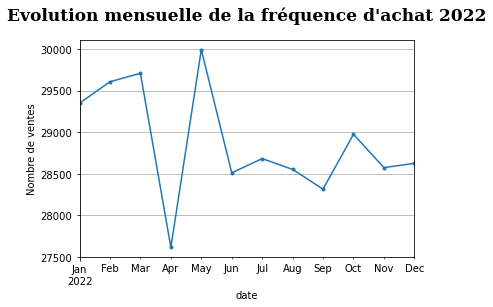

In [17]:
# Fréquence d'achat par mois pour 2022 : 

name = rapport['price'].copy()
fa_2022= name.loc['2022'].resample('M').count()
print("Fréquence d'achat par mois 2022 :")
print(fa_2022)
total2022 = fa_2022.sum()
print("total achats=", total2022)

fa_2022.plot(grid=True, marker=".")
plt.ylabel('Nombre de ventes')
plt.title("Evolution mensuelle de la fréquence d'achat 2022", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});

In [18]:
# Fréquence d'achat par categ par mois pour 2022 :

for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("Fréquence d'achat:",subset.loc['2022']['price'].resample('M').count())
    print()


--------------------
Catégorie : 0

Fréquence d'achat: date
2022-01-31    15402
2022-02-28    17292
2022-03-31    18056
2022-04-30    16479
2022-05-31    18424
2022-06-30    17278
2022-07-31    17514
2022-08-31    16658
2022-09-30    17234
2022-10-31    17674
2022-11-30    17320
2022-12-31    16941
Freq: M, Name: price, dtype: int64


--------------------
Catégorie : 1

Fréquence d'achat: date
2022-01-31    12560
2022-02-28    10459
2022-03-31    10126
2022-04-30     9502
2022-05-31    10047
2022-06-30     9790
2022-07-31     9470
2022-08-31    10305
2022-09-30     9566
2022-10-31     9726
2022-11-30     9798
2022-12-31    10063
Freq: M, Name: price, dtype: int64


--------------------
Catégorie : 2

Fréquence d'achat: date
2022-01-31    1386
2022-02-28    1854
2022-03-31    1525
2022-04-30    1635
2022-05-31    1520
2022-06-30    1443
2022-07-31    1698
2022-08-31    1589
2022-09-30    1515
2022-10-31    1574
2022-11-30    1456
2022-12-31    1621
Freq: M, Name: price, dtype: int64



## Pour 2023

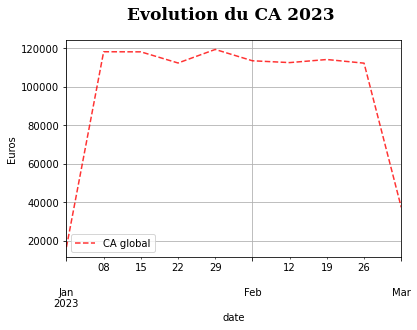

In [19]:
# Mis en day car peu de données (2mois)
rapport.loc['2023']['price'].resample('W').sum().plot(label='CA global', color='red', ls='--', alpha=0.8, grid=True)
plt.title("Evolution du CA 2023 ", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
plt.ylabel('Euros')
plt.legend()

In [20]:
name = rapport[['price', 'month']].copy()
ca_2023 = name.loc['2023'].groupby('month', as_index=False).sum()
print("CA global 2023 par mois :")
ca_2023['diff_ca'] = ca_2023['price'].diff().shift(-1)
ca_2023['tx_var'] = round(ca_2023['diff_ca']/ca_2023['price']*100,2).shift(1)
print(ca_2023)
tot2023 = round(ca_2023['price'].sum(),2)
print('total :', str(tot2023))

CA global 2023 par mois :
   month      price   diff_ca  tx_var
0      1  517615.03 -60860.79     NaN
1      2  456754.24       NaN  -11.76
total : 974369.27


In [21]:
# CA par categ par mois pour 2021 :
for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("CA:",subset.loc['2023'].groupby(['categ', 'month'])['price'].sum())


--------------------
Catégorie : 0

CA: categ  month
0      1        181357.54
       2        162531.48
Name: price, dtype: float64

--------------------
Catégorie : 1

CA: categ  month
1      1        210104.41
       2        180347.24
Name: price, dtype: float64

--------------------
Catégorie : 2

CA: categ  month
2      1        126153.08
       2        113875.52
Name: price, dtype: float64


In [22]:
# Fréquence d'achat par mois pour 2023 : 

name = rapport['price'].copy()
fa_2023= name.loc['2023'].resample('M').count()
print("Fréquence d'achat par mois 2023 :")
print(fa_2023)
total2023 = fa_2023.sum()
print("total achats=", total2023)




Fréquence d'achat par mois 2023 :
date
2023-01-31    28945
2023-02-28    25552
Freq: M, Name: price, dtype: int64
total achats= 54497


In [23]:
# Fréquence d'achat par categ par mois pour 2023 :

for categorie in rapport["categ"].unique():
    subset = rapport.loc[rapport.categ == categorie, :] # Création du sous-échantillon
    print()
    print("-"*20)
    print("Catégorie : "+ str(categorie))
    print()
    print("Fréquence d'achat:",subset.loc['2023']['price'].resample('M').count())
    print()


--------------------
Catégorie : 0

Fréquence d'achat: date
2023-01-31    17075
2023-02-28    15262
Freq: M, Name: price, dtype: int64


--------------------
Catégorie : 1

Fréquence d'achat: date
2023-01-31    10252
2023-02-28     8789
Freq: M, Name: price, dtype: int64


--------------------
Catégorie : 2

Fréquence d'achat: date
2023-01-31    1618
2023-02-28    1501
Freq: M, Name: price, dtype: int64



On constate une diminution du CA au mois de fév (sur ttes les catégories)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 10px; color: RGB(51,165,182); ">1.3- Décomposition en moyenne mobile</h3>
</div>

## **Définition moyenne mobile (Mobil Average) :** 
est la moyenne simple des dernières valeurs «n»(fenêtre). Cela peut nous aider à trouver des tendances (sur le court, moyen et long terme) qui seraient autrement difficiles à détecter. En outre, ils peuvent être utilisés pour déterminer les tendances à long terme. 

**Méthode :** 
.rolling()et .mean().
rolling()se chargera des calculs de la fenêtre mobile. Il prend la taille de la fenêtre (par exemple 10, 20, 50 jours etc..) et effectue des calculs uniquement sur les points de données dans cette fenêtre.
.mean()calculera la moyenne, à travers les points de données dans la fenêtre fournie dans la .rolling()fonction. Par exemple, si la taille de la fenêtre est définie sur 10 points de données, la moyenne de ces 10 points de données sera calculée.




Pour mieux visualiser, on va réaliser une décomposition en moyenne mobile pour évaluer la tendance globale. On va essayer 15, 60 et 90j court, moyen et long terme. Puis trés court 7j

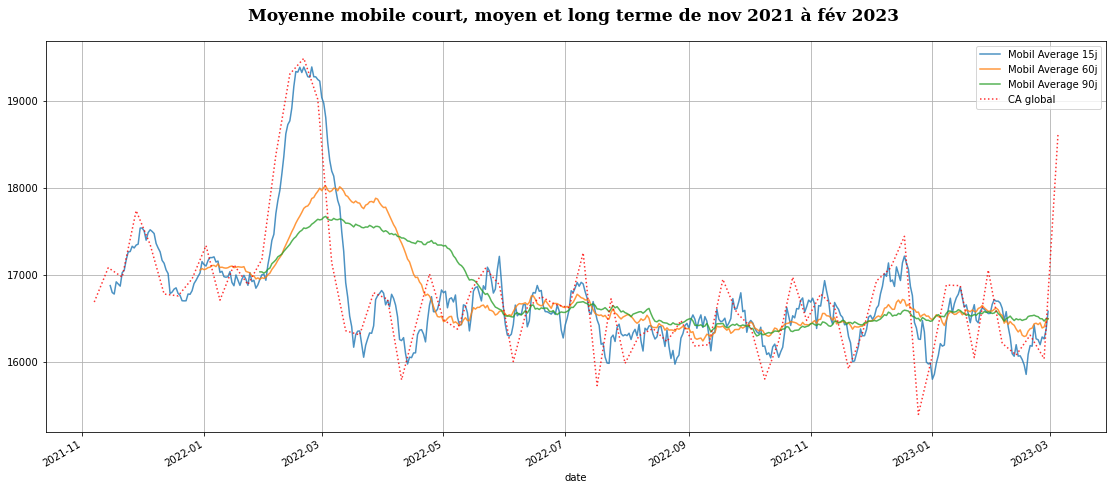

In [24]:
df_ma = rapport.copy()
df_ma = df_ma.resample('D').sum()
df_ma = df_ma.loc['2021-11':'2023-02']
plt.figure(figsize = (19,8))
plt.title("Moyenne mobile court, moyen et long terme de nov 2021 à fév 2023 ", pad=(20),
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 17});
df_ma['ma_15j'] = round(df_ma['price'].rolling(15).mean(),2)#.plot(label='Mobil Average 15j', alpha=0.8)
df_ma['ma_60j'] = round(df_ma['price'].rolling(60).mean(),2)#.plot(label='Mobil Average 60j', alpha=0.8)
df_ma['ma_90j'] = round(df_ma['price'].rolling(90).mean(),2)#.plot(label='Mobil Average 90j', alpha=0.8)
#df_ma['ma_7j'] = round(df_ma['price'].rolling(7).mean(),2).plot(label='Mobil Average 7j', alpha=0.8)
plt.plot(df_ma['ma_15j'], label='Mobil Average 15j', alpha=0.8)
plt.plot(df_ma['ma_60j'], label='Mobil Average 60j', alpha=0.8)
plt.plot(df_ma['ma_90j'], label='Mobil Average 90j', alpha=0.8)
Ca_global = df_ma['price'].resample('W').mean()
Ca_global.plot(label='CA global', color='red', ls=':', alpha=0.8, grid=False)
plt.grid("True")
plt.legend()



In [25]:
print(df_ma['ma_15j'].tail(7))

date
2023-02-22    16265.30
2023-02-23    16254.92
2023-02-24    16197.72
2023-02-25    16286.91
2023-02-26    16264.81
2023-02-27    16372.01
2023-02-28    16582.44
Freq: D, Name: ma_15j, dtype: float64


In [26]:
print(df_ma['ma_60j'].tail(7))

date
2023-02-22    16444.88
2023-02-23    16429.40
2023-02-24    16449.61
2023-02-25    16390.30
2023-02-26    16401.43
2023-02-27    16471.60
2023-02-28    16496.05
Freq: D, Name: ma_60j, dtype: float64


In [27]:
print(df_ma['ma_90j'].tail(7))

date
2023-02-22    16525.72
2023-02-23    16519.95
2023-02-24    16496.92
2023-02-25    16496.54
2023-02-26    16469.71
2023-02-27    16496.39
2023-02-28    16496.14
Freq: D, Name: ma_90j, dtype: float64


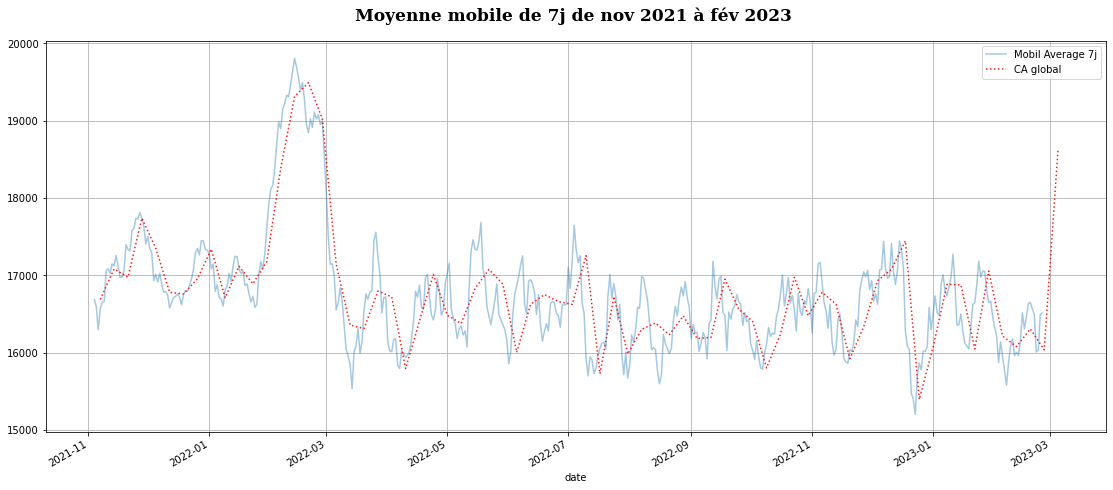

In [29]:
#Moyenne mobile des 7j

df_ma['ma_7j'] = round(df_ma['price'].rolling(7, center=True).mean(),2)

plt.figure(figsize = (19,8))
plt.title("Moyenne mobile de 7j de nov 2021 à fév 2023 ", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 17});
plt.plot(df_ma['ma_7j'],label='Mobil Average 7j', alpha=0.4)

Ca_global = df_ma['price'].resample('W').mean()
Ca_global.plot(label='CA global', color='red', ls=':', alpha=0.9)
plt.grid("True")
plt.legend()

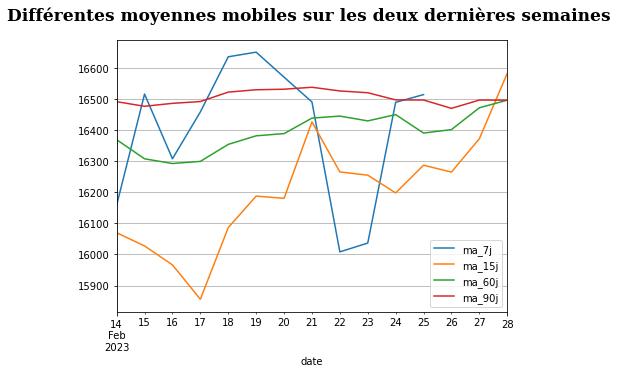

In [30]:
plt.figure(figsize=(7,5))
plt.title("Différentes moyennes mobiles sur les deux dernières semaines ", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 17});
df_ma['ma_7j'].tail(15).plot()
df_ma['ma_15j'].tail(15).plot()
df_ma['ma_60j'].tail(15).plot()
df_ma['ma_90j'].tail(15).plot()


plt.grid()
plt.legend()

In [31]:
print(df_ma['ma_7j'].tail(15))

date
2023-02-14    16158.62
2023-02-15    16515.65
2023-02-16    16307.65
2023-02-17    16458.27
2023-02-18    16635.55
2023-02-19    16650.45
2023-02-20    16570.00
2023-02-21    16490.30
2023-02-22    16008.27
2023-02-23    16036.54
2023-02-24    16489.09
2023-02-25    16513.98
2023-02-26         NaN
2023-02-27         NaN
2023-02-28         NaN
Freq: D, Name: ma_7j, dtype: float64


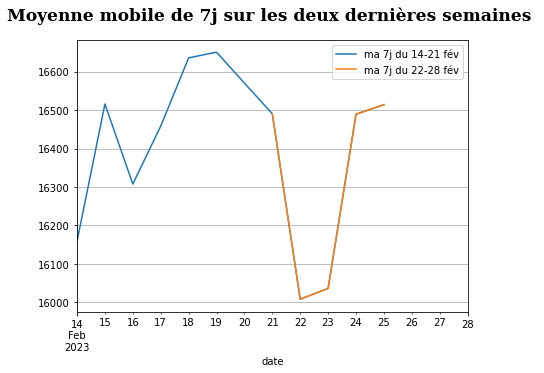

In [32]:
plt.figure(figsize=(7,5))
plt.title("Moyenne mobile de 7j sur les deux dernières semaines ", pad=(20),fontdict={'family': 'serif', 'color' : 'black','weight': 'bold','size': 17});
df_ma['ma_7j'].tail(15).plot(label='ma 7j du 14-21 fév')
df_ma['ma_7j'].tail(8).plot(label='ma 7j du 22-28 fév')
plt.grid()
plt.legend()

**Conclusion :** 

Les MA courtes (7j et 15j) sont assez fluctuantes et tendent à suivre les mm variations que le CA global. (variation moyenne de 500€) Plus on prend une MA sur le moyen et long terme, plus celle ci sera lisse. 

On peut également dire que le CA s'est stabilisé depuis juin 2022 jusqu'à aujourd'hui. En effet, le magasin en ligne n'a que 2 ans, c'est tt à fait normal de subir des fluctuations importantes (haussières ou baissières) lors des premières années.
Le CA moyen oscille entre 16 et 16.5k  
Il est important de préciser que d'après les données misent à disposition, nous n'avons qu'une seule année réellement complète. 